Michelle Hu  
---
University of Washington  
AMATH 563  
Homework 4  
Due: June 14, 2020  

### Directories

In [1]:
wd="/mnt/Backups/jmhu/git_dirs/ComplexSystems_AMATH563/hw4"
data_dir=wd+"/data/"
model_dir=wd+"/models/"

## Reaction-diffusion equation

In [2]:
# % REACTION-DIFFUSION
# uvt=[reshape(fft2(u(:,:,1)),1,N) reshape(fft2(v(:,:,1)),1,N)].';
# [t,uvsol]=ode45('reaction_diffusion_rhs',t,uvt,[],K22,d1,d2,beta,n,N);


# for j=1:length(t)-1
# ut=reshape((uvsol(j,1:N).'),n,n);
# vt=reshape((uvsol(j,(N+1):(2*N)).'),n,n);
# u(:,:,j+1)=real(ifft2(ut));
# v(:,:,j+1)=real(ifft2(vt));

# figure(1)
# pcolor(x,y,v(:,:,j+1)); shading interp; colormap(hot); colorbar; drawnow; 
# end

# save('reaction_diffusion_big.mat','t','x','y','u','v')

# %%
# load reaction_diffusion_big
# pcolor(x,y,u(:,:,end)); shading interp; colormap(hot)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.integrate import solve_ivp

#### Set-up

In [4]:
t=np.arange(0, 10+0.05, 0.05)
d1=0.1
d2=0.1
beta=1.0
L=20
n=512

N=n*n
x2=np.linspace(-L/2,L/2,n+1)
x=x2[:-1]
y=x
kx=(2*np.pi/L*np.concatenate((np.arange(0, n/2), 
                              np.arange(-n/2, 0))))
ky=kx

#### Initial conditions

In [5]:
X,Y = np.meshgrid(x, y)
KX, KY = np.meshgrid(kx, ky)
K2 = KX**2 + KY**2

K22 = np.reshape(K2, N, 1)
m=1 # number of spirals

u = np.zeros((len(x),len(y),len(t)))
v = np.zeros((len(x),len(y),len(t)))

u[:,:,0]=np.tanh(np.sqrt(X**2+Y**2))*np.cos(m*np.angle(X+Y*1j)-(np.sqrt(X**2 + Y**2)));
v[:,:,0]=np.tanh(np.sqrt(X**2+Y**2))*np.sin(m*np.angle(X+Y*1j)-(np.sqrt(X**2 + Y**2)));

In [6]:
# REACTION-DIFFUSION
uvt=np.concatenate((np.reshape(np.fft.fft2(u[:,:,0]), (1, N)).T, np.reshape(np.fft.fft2(v[:,:,0]), (1, N)).T))

In [7]:
def reaction_diffusion_rhs(t, uvt, K22, d1, d2, beta, n, N):
    # Calculate u and v
    ut = np.reshape(uvt[:N], (n,n))
    vt = np.reshape(uvt[N:2*N], (n,n))
    u = np.real(np.fft.ifft2(ut))
    v = np.real(np.fft.ifft2(vt))
    
    # Calculate reaction terms
    u3 = u**3
    v3 = v**3
    u2v = u**2*v
    uv2 = u*v**2
    utrhs = np.reshape(np.fft.fft2(u-u3-uv2+beta*u2v+beta*v3), (N,1))
    vtrhs = np.reshape(np.fft.fft2(v-u2v-v3-beta*u3-beta*uv2), (N,1))

#     l = [K22, uvt, ut, vt, u, v, u3, v3, u2v, uv2, utrhs, vtrhs]    
#     for i in l:
#         print(type(i), i.dtype, i.shape)

    rhs = np.concatenate((-d1*K22*np.squeeze(uvt[:N])+np.squeeze(utrhs), 
                          -d2*K22*np.squeeze(uvt[N:])+np.squeeze(vtrhs)))
    return rhs

In [8]:
%%time
y0=np.squeeze(uvt)
uvsol = solve_ivp(reaction_diffusion_rhs, t, y0,
                  args=(K22, d1, d2, beta, n, N), 
                  dense_output=True
                 )

CPU times: user 2min 3s, sys: 2min 22s, total: 4min 25s
Wall time: 17.4 s


In [9]:
uvsol.t.shape, uvsol.y.shape

((23,), (524288, 23))

In [19]:
ut=np.reshape(uvsol.sol(0)[:N].T, (n,n))
vt=np.reshape(uvsol.sol(0)[N:2*N], (n,n))

In [21]:
x.shape, y.shape, v.shape

((512,), (512,), (512, 512, 201))

TypeError: Invalid dimensions for image data

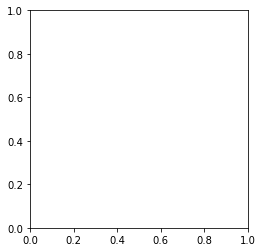

In [25]:
plt.imshow(v)

In [13]:
fig, ax = plt.subplots(1)

for i in t:
    ut=np.reshape(uvsol.sol(i)[:N].T, (n,n))
    vt=np.reshape(uvsol.sol(i)[N:2*N], (n,n))a
    u[:,:,i+1]=np.real(np.fft.ifft2(ut))
    v[:,:,i+1]=np.real(np.fft.ifft2(vt))


0.0
0.05
0.1
0.15000000000000002
0.2
0.25
0.30000000000000004
0.35000000000000003
0.4
0.45
0.5
0.55
0.6000000000000001
0.65
0.7000000000000001
0.75
0.8
0.8500000000000001
0.9
0.9500000000000001
1.0
1.05
1.1
1.1500000000000001
1.2000000000000002
1.25
1.3
1.35
1.4000000000000001
1.4500000000000002
1.5
1.55
1.6
1.6500000000000001
1.7000000000000002
1.75
1.8
1.85
1.9000000000000001
1.9500000000000002
2.0
2.0500000000000003
2.1
2.15
2.2
2.25
2.3000000000000003
2.35
2.4000000000000004
2.45
2.5
2.5500000000000003
2.6
2.6500000000000004
2.7
2.75
2.8000000000000003
2.85
2.9000000000000004
2.95
3.0
3.0500000000000003
3.1
3.1500000000000004
3.2
3.25
3.3000000000000003
3.35
3.4000000000000004
3.45
3.5
3.5500000000000003
3.6
3.6500000000000004
3.7
3.75
3.8000000000000003
3.85
3.9000000000000004
3.95
4.0
4.05
4.1000000000000005
4.15
4.2
4.25
4.3
4.3500000000000005
4.4
4.45
4.5
4.55
4.6000000000000005
4.65
4.7
4.75
4.800000000000001
4.8500000000000005
4.9
4.95
5.0
5.050000000000001
5.1000000000000005

In [10]:
uvsol

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 152
     njev: 0
      nlu: 0
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x7fb9b26a1550>
   status: 0
  success: True
        t: array([0.        , 0.0010161 , 0.00203221, 0.00315733, 0.00435708,
       0.00571297, 0.00727889, 0.0090731 , 0.01106676, 0.01323044,
       0.01556407, 0.01804881, 0.0206112 , 0.02336264, 0.02646506,
       0.02994835, 0.033854  , 0.03745021, 0.04001184, 0.04257346,
       0.04524611, 0.04794101, 0.05      ])
 t_events: None
        y: array([[ 199.29961096    +0.j        ,  199.08913474    +0.j        ,
         198.88057038    +0.j        , ...,
         190.48143787    +0.j        ,  189.97339063    +0.j        ,
         189.58603205    +0.j        ],
       [-148.67401334 -3747.41876627j, -149.08030921 -3746.12941139j,
        -149.48861108 -3744.85388648j, ...,
        -167.17414666 -3693.80663346j, -168.28205719 -3690.71196377j,
        -169

## Kuramoto-Sivashinsky equation

In [ ]:
def ks():
    
    return

#### 1. Train a NN that can advance the solution from t to t + ∆t for the KS equation

#### 2. Compare your evolution trajectories for your NN against using the ODE time-stepper provided with different initial conditions

#### 3. For the reaction-diffusion system, first project to a low-dimensional subspace via the SVD and see how forecasting works in the low-rank variables.

## Lorenz equations

In [ ]:
def lorenz_deriv(x_y_z, t0, sigma, beta, rho):
    x, y, z = x_y_z
    return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]

In [ ]:
dt = 0.01
T = 8
t = np.arange(0,T+dt,dt)
beta = 8/3
sigma = 10
rho = 28

#### 1. Train a NN to advance the solution from t to t+∆t for ρ=10, 28 and 40. Now see how well your NN works for future state prediction for ρ = 17 and ρ = 35.

#### 2. See if you can train your NN to identify (for ρ = 28) when a transition from one lobe to another is imminent. Determine how far in advance you can make this prediction. (NOTE: you will have to label the transitions in a test set in order to do this task)

In [18]:
# odeint example

y0=5

def model(y, t, k):
    dydt = -k * y
    return dydt


t=np.linspace(0,20)

ks=np.array([0.1, 0.2, 0.5])
ys=[]

for k in ks:
    print(k)
    y=odeint(model, y0, t, args=(k,))
    ys.append(y)
ys=(np.array(ys))

0.1
0.2
0.5


(50, 1)
(50, 1)
(50, 1)


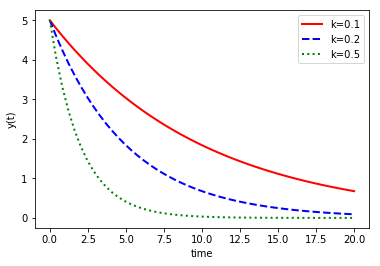

In [19]:
lss=['r-', 'b--', 'g:']
for k, y, ls in zip(ks, ys, lss):
    print(y.shape)
    plt.plot(t, y, ls, linewidth=2, label='k='+str(k))
plt.xlabel('time')
plt.ylabel('y(t)')
plt.legend()
plt.show()    